# Importing necessary libraries

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras import utils
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sn
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import Data

In [3]:
COLUMN_NAMES = [
        'SepalLength', 
        'SepalWidth',
        'PetalLength', 
        'PetalWidth', 
        'Species'
        ]

data = pd.read_csv('iris_data.csv', names=COLUMN_NAMES, header=0)
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

# Data Analysis 

## Data Types Analysis

In [61]:
data.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Species         object
dtype: object

## Handle Categorical Variables

In [5]:
data['Species'] = data['Species'].astype("category")
data.dtypes

SepalLength     float64
SepalWidth      float64
PetalLength     float64
PetalWidth      float64
Species        category
dtype: object

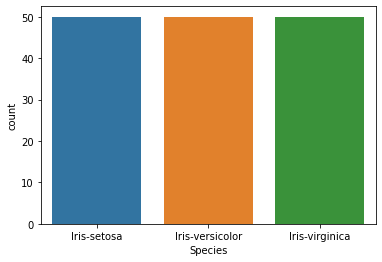

In [6]:
distribution = sn.countplot(x="Species", data=data)
plt.show(distribution)

## Missing Information

In [7]:
print(data.isnull().sum())

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64


## Split Data to Test and Train

In [31]:
# y_train

In [9]:
#from tensorflow.keras import utils as utils


In [30]:
# from sklearn.datasets import load_iris
# dataset=load_iris()
# data=pd.DataFrame(dataset['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
# data['Species']=dataset['target']
# data
# data['Species']=data['Species'].apply(lambda x: dataset['target_names'][x])

In [9]:
 data.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [10]:
data.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [ ]:
# Sno, V1 , V2 , Dep
# Row1,30 , 20 , 1 
# Row2 , 40,10,0
# Row3 , 50,20,1



# Tensroflow 

# One Hot Encoding 


# Class1 # Class2 # Class3 
#1 #0 #0
#0#1 # 0 




In [11]:
from tensorflow import keras
from sklearn import preprocessing

output_data = data["Species"] # Dep Var
input_data = data.drop("Species",axis=1) # indepedent var

X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.3, random_state=42)

# Encode for string labels
label_encoder = preprocessing.LabelEncoder().fit(y_train)
y_train = label_encoder.transform(y_train)

# Encode for string labels
label_encoder = preprocessing.LabelEncoder().fit(y_test)
y_test = label_encoder.transform(y_test)



y_train = tf.keras.utils.to_categorical(y_train) 
y_test = tf.keras.utils.to_categorical(y_test)

print("Input training size: ", X_train.shape[0])
print("Output training size: ", y_train.shape[0])
print("Input testing size: ", X_test.shape[0])
print("Output testing size: ", y_test.shape[0])

Input training size:  105
Output training size:  105
Input testing size:  45
Output testing size:  45


In [12]:
y_train # depdent variable array 

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

In [13]:
X_train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


## Creating & compiling a model

In [17]:
model = Sequential()

model.add(Dense(10, input_dim=4, activation='relu'))

model.add(Dense(10, activation='relu'))

model.add(Dense(3, activation='softmax')) # Sigmoid , Softmax , Relu 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training a model

In [24]:
X_train.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')

In [19]:
model.fit(X_train, y_train, epochs=300, batch_size=10)

Epoch 1/300
11/11 [==============================] - 0s 996us/step - loss: 1.0918 - accuracy: 0.3598
Epoch 2/300
11/11 [==============================] - 0s 1ms/step - loss: 1.0926 - accuracy: 0.4803
Epoch 3/300
11/11 [==============================] - 0s 900us/step - loss: 1.0420 - accuracy: 0.5976
Epoch 4/300
11/11 [==============================] - 0s 1ms/step - loss: 1.0127 - accuracy: 0.6431
Epoch 5/300
11/11 [==============================] - 0s 1ms/step - loss: 0.9695 - accuracy: 0.6975
Epoch 6/300
11/11 [==============================] - 0s 2ms/step - loss: 0.9372 - accuracy: 0.7198
Epoch 7/300
11/11 [==============================] - 0s 1ms/step - loss: 0.9296 - accuracy: 0.6001
Epoch 8/300
11/11 [==============================] - 0s 1ms/step - loss: 0.9327 - accuracy: 0.5970
Epoch 9/300
11/11 [==============================] - 0s 1ms/step - loss: 0.9065 - accuracy: 0.6610
Epoch 10/300
11/11 [==============================] - 0s 900us/step - loss: 0.8873 - accuracy: 0.6282
Epo

Epoch 163/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0999 - accuracy: 0.9788
Epoch 164/300
11/11 [==============================] - 0s 1ms/step - loss: 0.1330 - accuracy: 0.9628
Epoch 165/300
11/11 [==============================] - 0s 900us/step - loss: 0.1051 - accuracy: 0.9682
Epoch 166/300
11/11 [==============================] - 0s 800us/step - loss: 0.1057 - accuracy: 0.9734
Epoch 167/300
11/11 [==============================] - 0s 900us/step - loss: 0.1036 - accuracy: 0.9793
Epoch 168/300
11/11 [==============================] - 0s 1ms/step - loss: 0.1144 - accuracy: 0.9660
Epoch 169/300
11/11 [==============================] - 0s 1ms/step - loss: 0.1052 - accuracy: 0.9800
Epoch 170/300
11/11 [==============================] - 0s 1ms/step - loss: 0.1296 - accuracy: 0.9615
Epoch 171/300
11/11 [==============================] - 0s 1ms/step - loss: 0.1031 - accuracy: 0.9650
Epoch 172/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0958 - a

## Evaluate the model

In [21]:
X_test.shape

(45, 4)

In [20]:
scores = model.evaluate(X_test, y_test)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

2/2 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 1.0000

Accuracy: 100.00%


## Predict

In [22]:
prediction = model.predict(X_test)
prediction1 = pd.DataFrame({'IRIS1':prediction[:,0],'IRIS2':prediction[:,1], 'IRIS3':prediction[:,2]})
prediction1.round(decimals=4).head()

,IRIS1,IRIS2,IRIS3
0,0.0001,0.9739,0.0260
1,0.9990,0.0010,0.0000
2,0.0000,0.0000,1.0000
3,0.0000,0.9428,0.0571
4,0.0000,0.9773,0.0226
